In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision.transforms import ToTensor, Lambda
from IPython.display import clear_output

In [9]:
train_and_valid_set = torchvision.datasets.FashionMNIST("./data", download=True, train=True, transform=
                                                ToTensor())
train_set, valid_set = torch.utils.data.dataset.random_split(train_and_valid_set, [48000, 12000])
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               ToTensor()) 

In [10]:
class NeuralNetwork(nn.Module):
    '''
    A simple neural network model for the fashionMNIST data set 
    - the input features should be a matrix of size 28x28
    FULLY CONNECTED -- 2 HIDDEN LAYERS
    '''
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        input_features = 28*28
        num_nodes = 256
        num_classes = 10

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_features, num_nodes),   # layer 1
            nn.ReLU(),  # activation function 
            nn.Linear(num_nodes, num_nodes),        # layer 2
            nn.ReLU(),  # activation function 
            nn.Linear(num_nodes, num_classes)       # output layer
        )

    def forward(self, x):
        '''
        Execute the sequential stack for a flattened matrix and 
        return the raw logits 
        '''
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [30]:
def update_data(BATCH_SIZE=128):
    train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
    valid_loader = DataLoader(dataset=valid_set, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(dataset=test_set,batch_size=BATCH_SIZE, shuffle=False)
    return train_loader, valid_loader, test_loader

In [34]:
def train_loop(dataloader: DataLoader, 
                model: NeuralNetwork, 
                loss_function: torch.nn.modules.loss, 
                optimizer: torch.optim) -> tuple[list, float]:
                
    ''' training loop, update optimization parameters 
        for each batch 
    '''

    size = len(dataloader.dataset)
    correct = 0
    for batch, (image, image_label) in enumerate(dataloader):
        prediction = model(image)
        loss = loss_function(prediction, image_label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        correct += (prediction.argmax(1) == image_label).type(torch.float).sum().item()
    correct /= size
    return 100 * correct

def validation_loop(dataloader: DataLoader, 
                model: NeuralNetwork, 
                loss_function: torch.nn.modules.loss):

    ''' validation loop, don't update optimization parameters 
        for each batch 
    '''

    size = len(dataloader.dataset)
    correct = 0

    with torch.no_grad():
        for image, image_class in dataloader:
            pred = model(image)
            correct += (pred.argmax(1) == image_class).type(torch.float).sum().item()

    correct /= size
    return 100 * correct

In [35]:
#----------------------
train_loader, valid_loader, test_loader = update_data(128)
model = NeuralNetwork()
loss_function = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 20
#----------------------
train_accuracies = []; valid_accuracies = []
for t in range(epochs):
    clear_output(wait=True)
    print(f"Currently on Epoch {t+1}....")
    train_accuracy = train_loop(train_loader, model, loss_function, optimizer)
    train_accuracies.append(train_accuracy)
    valid_accuracy = validation_loop(valid_loader, model, loss_function)
    valid_accuracies.append(valid_accuracy)
print("Done!")

Currently on Epoch 20....
Done!


In [38]:
test_accuracy = validation_loop(test_loader, model, loss_function)

In [39]:
test_accuracy

88.6

Text(0, 0.5, '% Accuracy')

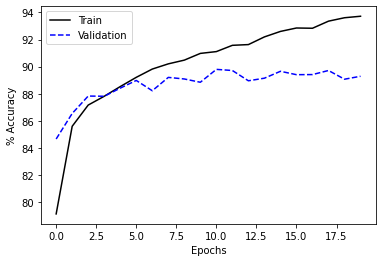

In [36]:
plt.plot(range(len(train_accuracies)), train_accuracies, 'k-', label = 'Train')
plt.plot(range(len(valid_accuracies)), valid_accuracies, 'b--', label = 'Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')

Below is the final comparison test

In [37]:
#----------------------
train_loader, valid_loader, test_loader = update_data(128)
model = NeuralNetwork()
loss_function = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 20
#----------------------
train_accuracies = []; valid_accuracies = []
for t in range(epochs):
    clear_output(wait=True)
    print(f"Currently on Epoch {t+1}....")
    train_accuracy = train_loop(train_loader, model, loss_function, optimizer)
    train_accuracies.append(train_accuracy)
    valid_accuracy = validation_loop(valid_loader, model, loss_function)
    valid_accuracies.append(valid_accuracy)
print("Done!")

89.29166666666667